# STEP 1- IMPORTING NECESSARY LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

Since we are importing excel file we use "pd.read_excel"

# STEP 2 - IMPORTING THE DATASET

In [6]:
df =  pd.read_excel("C:/Users/hilal/Downloads/Dry_Bean_Dataset.xlsx")

# STEP 3 -  DATA EXPLORATION AND ANALYSIS

 What's the range of this data

In [9]:
df.index

RangeIndex(start=0, stop=13611, step=1)

In [10]:
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

The review of datas first 5 row

In [12]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


The rewiev of data's last 5 row

In [14]:
df.tail()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON
13610,42159,772.237,295.142741,182.204716,1.619841,0.786693,42600,231.686223,0.788962,0.989648,0.888380,0.784997,0.007001,0.001640,0.616221,0.998180,DERMASON


The statistical values of each column

In [17]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


Is there any null values ?

In [19]:
df.isnull()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13607,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13608,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13609,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


To make sure , since we cant see whole data set , with using " isnull().sum() " we can see total number of null values in columns

In [21]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

To observe unique values in "class" column

In [23]:
unique_values_class = df["Class"].unique().tolist()

In [24]:
unique_values_class

['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON']

To see the commonly used values in columns

In [26]:
df.max()

Area                   254616
Perimeter             1985.37
MajorAxisLength    738.860153
MinorAxisLength    460.198497
AspectRation         2.430306
Eccentricity         0.911423
ConvexArea             263261
EquivDiameter      569.374358
Extent               0.866195
Solidity             0.994677
roundness            0.990685
Compactness          0.987303
ShapeFactor1         0.010451
ShapeFactor2         0.003665
ShapeFactor3         0.974767
ShapeFactor4         0.999733
Class                    SIRA
dtype: object

Before i jump through the data visulization i need to see data types if we need to transform data types

In [28]:
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

Since it says "object" to Class columns data type we need to transform Class variable to categoric variable. 

# VARIABLE TRANSFORMATION

Setting the class variable into categorical variable will help our data to visualize clearliy , in more occurate 
with"astype()"

In [32]:
df['Class'] = df['Class'].astype('category')

Double check if the data type changed

In [34]:
print(df['Class'].dtypes)

category


# STEP 4 - DATA VISULIZATION

Distributions of class with other numerical variables such as "Area" , "Perimeter" , "Solidity" using boxplot to provide which beans are smilar
which of th futures differantiate them

<Axes: xlabel='Class', ylabel='Area'>

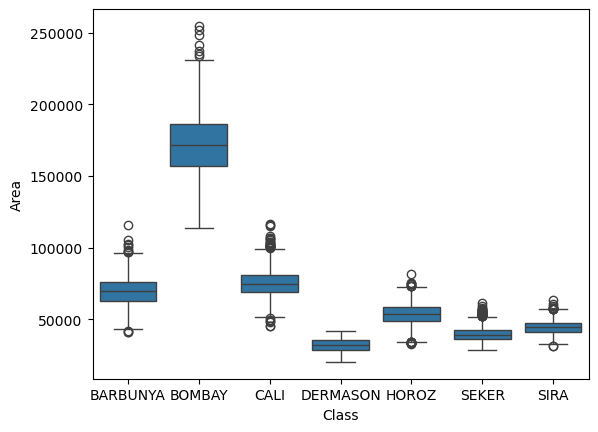

In [37]:
sns.boxplot(x='Class', y='Area', data=df)

<Axes: xlabel='Class', ylabel='Perimeter'>

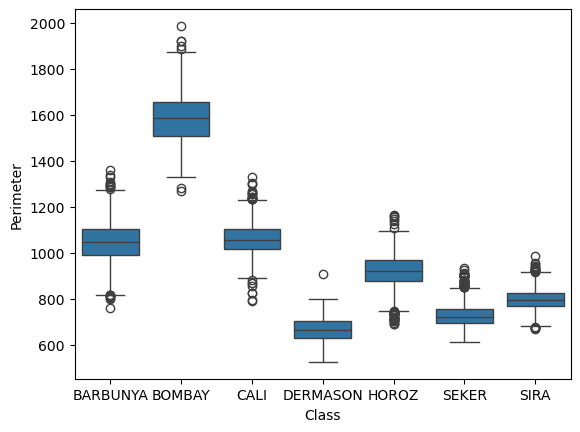

In [38]:
sns.boxplot(x='Class', y='Perimeter', data=df) 

<Axes: xlabel='Class', ylabel='Solidity'>

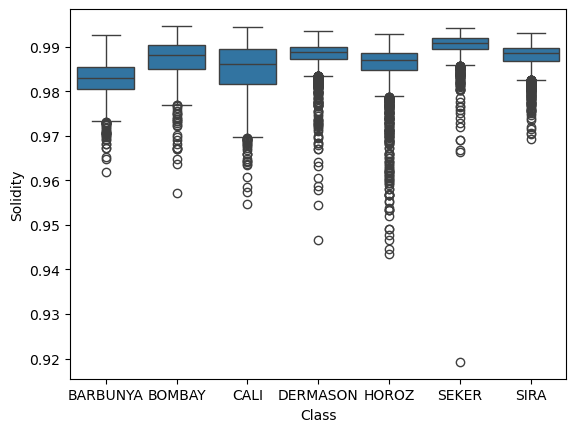

In [39]:
sns.boxplot(x='Class', y='Solidity', data=df) 

I use scatter plot to visuliaze th relationship between two numerical value , 'Area' and 'Perimeter' , based on class variable for how different classes vary within these relationships.

<Axes: xlabel='Area', ylabel='Perimeter'>

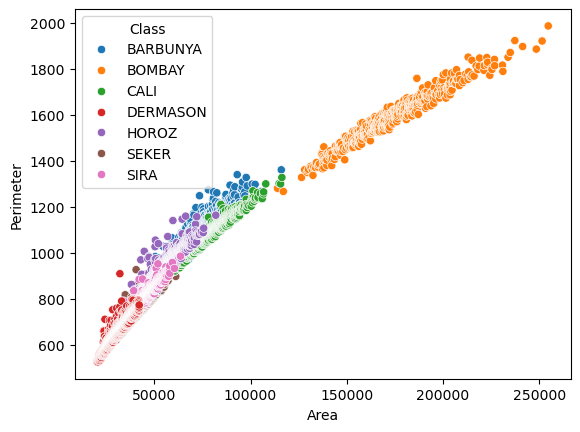

In [41]:
sns.scatterplot(x='Area', y='Perimeter', hue='Class', data=df)

I use histogram to overlay visualizes the distribution of the Area feature in the dataset. The histogram shows the frequency of different area values, while the KDE curve provides a smoothed estimate of the probability density, helping to identify patterns in the data distribution.

<Axes: xlabel='Area', ylabel='Count'>

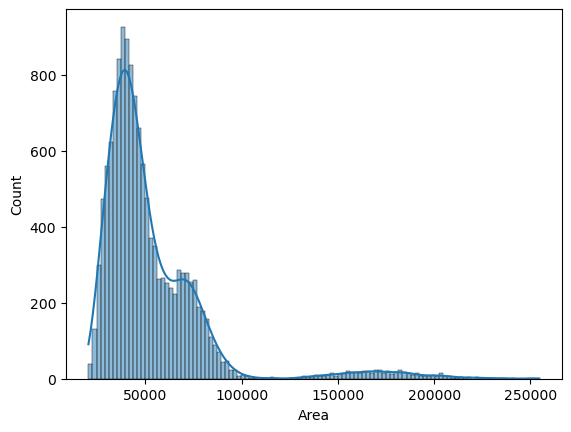

In [43]:
sns.histplot(df['Area'], kde=True)

This histogram with a KDE (Kernel Density Estimate) overlay visualizes the distribution of the Compactness feature in the dataset. The histogram shows the frequency of different compactness values, and the KDE curve smooths the distribution, helping to identify the overall shape and spread of compactness values across the dry bean classes.

<Axes: xlabel='Compactness', ylabel='Count'>

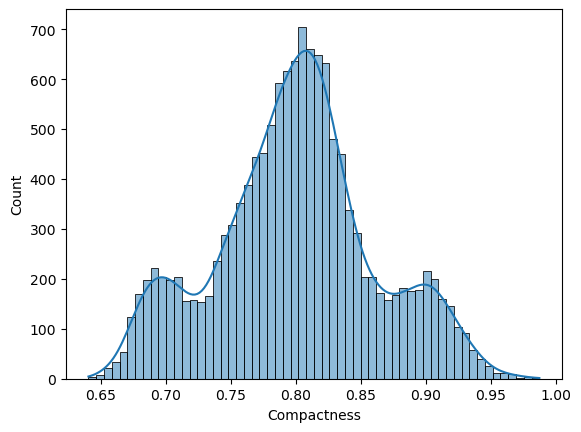

In [50]:
sns.histplot(df['Compactness'], kde=True)

Correlation matrix of data ,  I filter the datatypes as float and int

In [58]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [62]:
numeric_df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
dtype: object

This heatmap displays the correlation matrix of the numerical features in the dataset, with annotations showing the correlation coefficients. The coolwarm color scheme helps to visually distinguish positive and negative correlations, allowing us to observe relationships between different features in the dry bean dataset.

<Axes: >

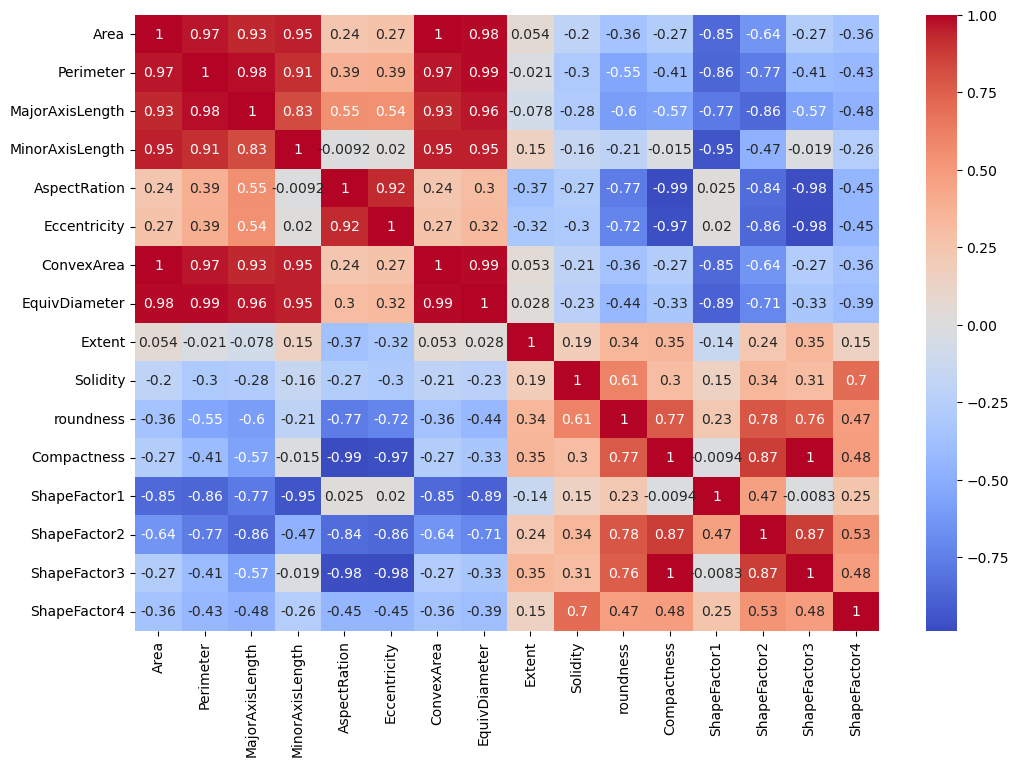

In [64]:
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

This violin plot visualizes the distribution of MajorAxisLength across different Class categories of dry beans, highlighting the spread, density, and potential differences in the major axis length for each class.

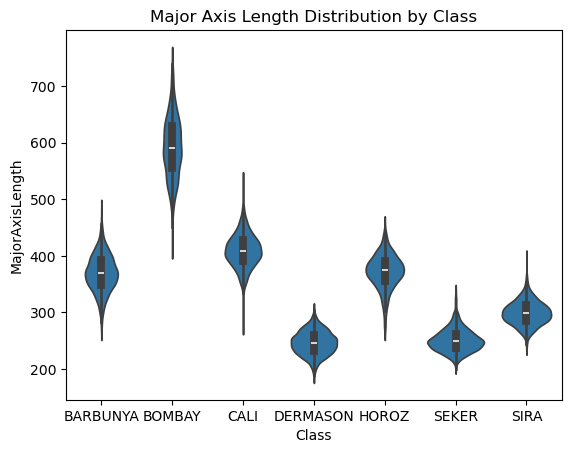

In [67]:
sns.violinplot(x='Class', y='MajorAxisLength', data=df)
plt.title('Major Axis Length Distribution by Class')
plt.show()

This violin plot helps to visualize the distribution of MinorAxisLength across different Class categories of dry beans, showing the spread and density of values within each class.

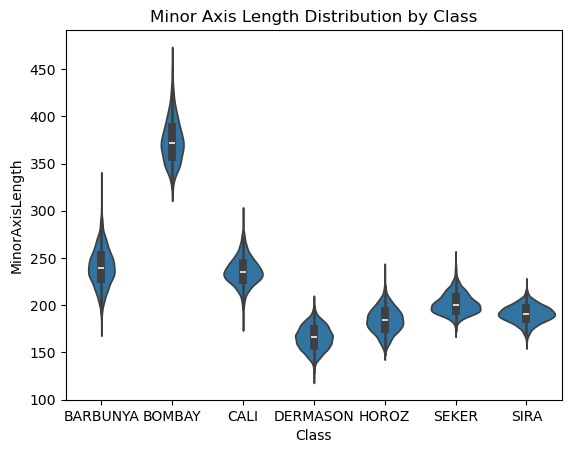

In [70]:
sns.violinplot(x='Class', y='MinorAxisLength', data=df)
plt.title('Minor Axis Length Distribution by Class')
plt.show()

To observe the relationship between the Eccentricity and ConvexArea of dry beans, colored by their Class, to see how these two features vary across different types of beans.

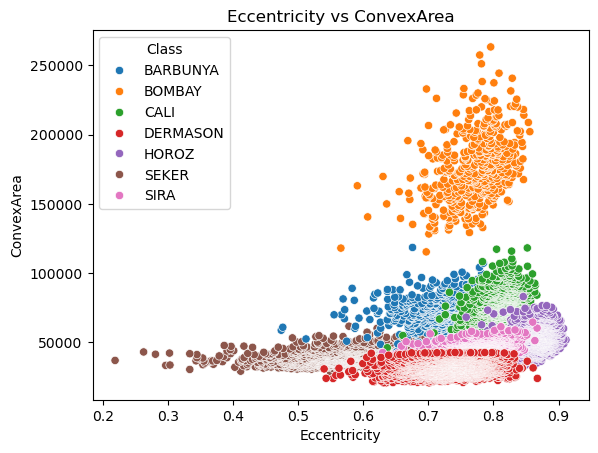

In [73]:
sns.scatterplot(x='Eccentricity', y='ConvexArea', hue='Class', data=df)
plt.title('Eccentricity vs ConvexArea')
plt.show()

# STEP 5 - SCALİNG

Separates the feature variables by dropping the target variable 'Class' from the dataset.

In [76]:
X = df.drop('Class', axis=1)
y = df['Class']

Assigns the target variable 'Class' to the variable y

Splits the dataset into training and testing sets, using 80% for training and 20% for testing.

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

to standardize the dataset by removing the mean and scaling to unit variance.

In [82]:
scaler = StandardScaler()

Fits the scaler to the training data and transforms it to have zero mean and unit variance.
Applies the same transformation to the test data using the scaler fitted on the training data.


In [84]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Prints the dimensions of the scaled training dataset.

In [87]:
print(f"Training set shape: {X_train_scaled.shape}")

Training set shape: (10888, 16)


Prints the dimensions of the scaled test dataset.

In [90]:
print(f"Test set shape: {X_test_scaled.shape}")

Test set shape: (2723, 16)


# STEP 6 - Comparison of MLPClassifier Model and Stochastic Strategies


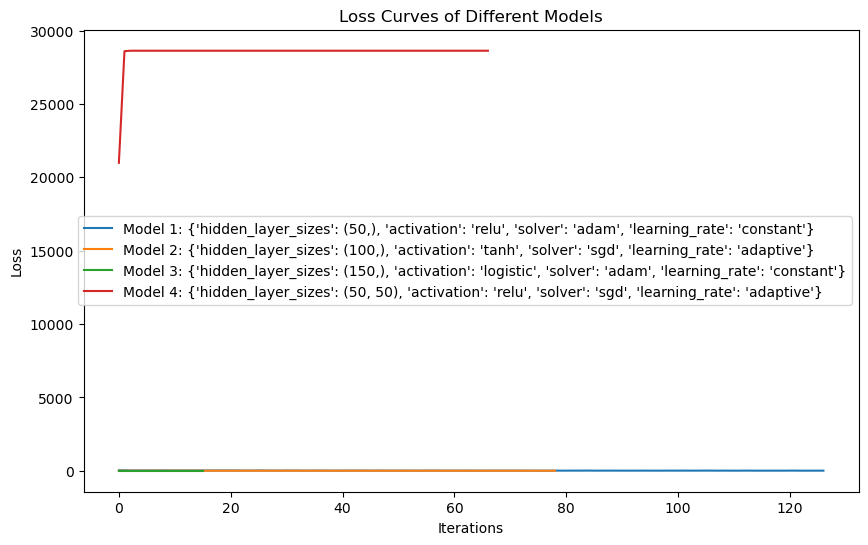

In [94]:
params = [
    {'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'adam', 'learning_rate': 'constant'},
    {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'sgd', 'learning_rate': 'adaptive'},
    {'hidden_layer_sizes': (150,), 'activation': 'logistic', 'solver': 'adam', 'learning_rate': 'constant'},
    {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'sgd', 'learning_rate': 'adaptive'}
]  # Defines a list of dictionaries, each containing a different set of parameters for the MLPClassifier models.

plt.figure(figsize=(10, 6))  #Creates a figure with a specific size for plotting the loss curves.

for i, param in enumerate(params):
    model = MLPClassifier(max_iter=200, **param, random_state=42) # Iterates over the parameter sets, creating an MLPClassifier model for each set.
    model.fit(X_train, y_train) # Trains the current MLPClassifier model on the training dataset
    plt.plot(model.loss_curve_, label=f"Model {i+1}: {param}")  #Plots the loss curve of the current model with a label indicating its parameter set.


plt.title("Loss Curves of Different Models") # Sets the title of the plot
plt.xlabel("Iterations") # Sets the label for the x-axis of the plot.
plt.ylabel("Loss") # Sets the label for the y-axis of the plot.
plt.legend() # Adds a legend to the plot to identify each model's loss curve.
plt.show() # Displays the plot containing the loss curves of all models.

# STEP 7 - GRID SEARCH

In [96]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive']
}
# Defines a dictionary of parameter options for the GridSearchCV, including possible values for hidden layer sizes, activation functions, solvers, and learning rates.

In [98]:
grid_search = GridSearchCV(MLPClassifier(max_iter=200, random_state=42), param_grid, cv=3, scoring='accuracy')
# Initializes a GridSearchCV object with a multilayer perceptron (MLPClassifier), the defined parameter grid, 3-fold cross-validation, and accuracy as the scoring metric.

In [101]:
grid_search.fit(X_train, y_train)
# Trains multiple MLPClassifier models using the combinations of parameters in the grid on the training dataset.

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=42),
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam', 'sgd']},
             scoring='accuracy')

In [121]:
print("Best Parameters:", grid_search.best_params_)
# Displays the combination of parameters that resulted in the best accuracy during the grid search.

Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}


# STEP 8 - FINAL MLP MODEL

In [123]:
best_model = grid_search.best_estimator_
# Retrieves the best-performing model found during the grid search.

In [124]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
y_pred = best_model.predict(X_test_scaled_df)
# Uses the best model to make predictions on the scaled test data.

In [125]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Prints a detailed classification report, including precision, recall, and F1-score for each class.

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.62      0.03      0.06       261
      BOMBAY       0.00      0.00      0.00       117
        CALI       0.03      0.00      0.01       317
    DERMASON       0.51      0.08      0.14       671
       HOROZ       0.50      0.01      0.01       408
       SEKER       0.34      0.99      0.50       413
        SIRA       0.23      0.57      0.33       536

    accuracy                           0.29      2723
   macro avg       0.32      0.24      0.15      2723
weighted avg       0.36      0.29      0.18      2723



In [126]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Calculates the confusion matrix for the test set predictions.

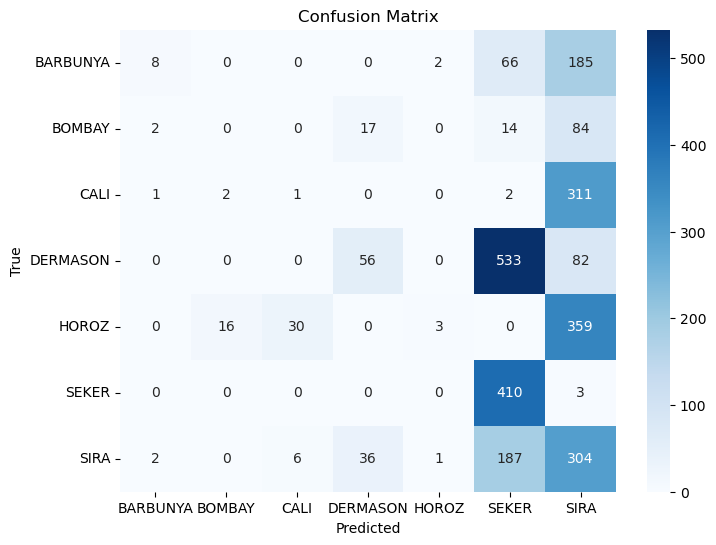

In [127]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
# Visualizes the confusion matrix as a heatmap with annotated class labels and counts.